UANL  - FCFM

Tercer parcial Introducción al aprendizaje automatico

13 de Noviembre de 2021

Profesor: MCE. Angel Adrián Domínguez Lozano

Alumno: Humberto Gerardo Peña Páez

# 1. **(30 puntos)** Investiga/define lo siguiente:

* **Estrategias de exploración en aprendizaje reforzado**
  Aparte de las estrategías de exploración, también están las de explotación. En este caso las de exploración buscan la manera de ir obteniendo recompensas y así mismo tratando de evitar penalizaciones. Un ejemplo de estas estrategías es que seleccione cosas al azar, pero al ser muy a la deriva los resultados obtenidos son muy pobres. Otra estrategía es el Epsilo-Greedy, el cual elige la acción que se cree que tiene el mayor efecto a largo plazo, pero de lo contrario se elije una acción completamente al azar. El algortimo del límite de confianza superior elije una probabilidad constante, busca mayor conocimiento del entorno, esta enfocado en la exploración. Por mencionar otro, es la estrategía de exploración de Boltzmann, el cual es enfocado para decisiones secuenciales hechas bajo circunstancias en las que se tiene poca información. El sampleo de Thomson consiste en maximizar la recompensa con respecto a una acción al azar. Así mismo, existe la estregía de la perdida de entropía, la cual consiste en encaminar a la política a tomar diversas acciones y también tenemos la estrategía de la exploración basada en ruido, la cual añade ruido al espacio de observación o a la acción.

---

* **Deep Learning** 

  Es un algoritmo de los mas usados en el aprendizaje reforzado. Este tiene como objetivo aprender una serie de normas o politicas, las cuales le diran al agente que accion debe tomar y bajo que circunstancias. En general, busca obtener la mayor recompensa, avanzar y no quedarnos en el mismo lugar, llegando asi a la mejor solución posible.

# 2. **(70 puntos)** Considera las 1000 imagenes proporcionadas en el archivo Data Parcial 3.zip

Usando almenos 2 de los siguientes algoritmos:
* K Means
* Clustering jerarquico
* Clustering espectral
* Tsne

determina ¿cuántas frutas distintas están representadas?

Entregable: El código utilizado y una explicación (puede ser en un PDF aparte) 

Nota: Se sugiere crear alguna representación de las imágenes con un número menor de dimensiones.

##Importación, normalización de datos

In [1]:
import os
import pandas
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Sugerencia: Si vas a usar Colab, sube los archivos a una carpeta en Drive para evitar subirlos
# nuevamente en caso de que se desconecte la notebook 
os.chdir('/content/drive/My Drive/Collabs IAAut/TercerParcial/Data Parcial 3')

In [4]:
os.listdir()

['images_0259.png',
 'images_0062.png',
 'images_0876.png',
 'images_0338.png',
 'images_0271.png',
 'images_0152.png',
 'images_0426.png',
 'images_0718.png',
 'images_0654.png',
 'images_0478.png',
 'images_0645.png',
 'images_0448.png',
 'images_0575.png',
 'images_0545.png',
 'images_0547.png',
 'images_0538.png',
 'images_0674.png',
 'images_0911.png',
 'images_0112.png',
 'images_0929.png',
 'images_0477.png',
 'images_0138.png',
 'images_0146.png',
 'images_0027.png',
 'images_0842.png',
 'images_0268.png',
 'images_0672.png',
 'images_0189.png',
 'images_0724.png',
 'images_0074.png',
 'images_0471.png',
 'images_0079.png',
 'images_0263.png',
 'images_0763.png',
 'images_0583.png',
 'images_0463.png',
 'images_0998.png',
 'images_0699.png',
 'images_0419.png',
 'images_0562.png',
 'images_0376.png',
 'images_0008.png',
 'images_0710.png',
 'images_0537.png',
 'images_0162.png',
 'images_0130.png',
 'images_0302.png',
 'images_0214.png',
 'images_0025.png',
 'images_0618.png',


In [5]:
files= os.listdir()

In [6]:
len(files)

1000

In [8]:
images = [mpimg.imread(x) for x in files]

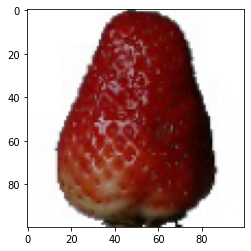

In [9]:
plt.imshow(images[999])

In [10]:
# Las imagenes se conforman de arreglos con números entre 0 y 1
images[1]

array([[[1.        , 1.        , 0.9843137 ],
        [1.        , 1.        , 0.9843137 ],
        [0.99607843, 1.        , 0.99215686],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 0.9843137 ],
        [1.        , 1.        , 0.9843137 ],
        [1.        , 1.        , 0.99215686],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.9843137 , 1.        , 0.9882353 ],
        [0.99607843, 1.        , 0.99215686],
        [1.        , 1.        , 0.99215686],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

In [11]:
# Redondeo a represetnación en enteros entre 0 y 255
np.uint8(images[1]*255)

array([[[255, 255, 251],
        [255, 255, 251],
        [254, 255, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 251],
        [255, 255, 251],
        [255, 255, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[251, 255, 252],
        [254, 255, 253],
        [255, 255, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [12]:
from PIL import Image

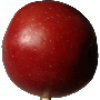

In [13]:
# Plot de imagenes en escala 0-255
Image.fromarray(np.uint8(images[0]*255))

In [14]:
data = np.array(images)

In [15]:
data.shape

(1000, 100, 100, 3)

In [16]:
# Reshape de las imagenes
data = data.reshape((1000,30000))

In [17]:
data.shape

(1000, 30000)

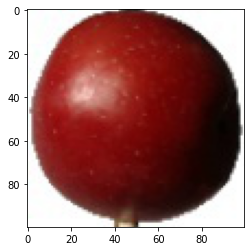

In [18]:
plt.imshow(data[0].reshape(100,100,3))

##TSNE

In [19]:
from sklearn.manifold import TSNE
import pandas as pd
import plotly.express as px

In [28]:
tsne = TSNE(n_components=3, verbose=1, perplexity=50, n_iter=2000)
tsne_results = tsne.fit_transform(data)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.027s...
[t-SNE] Computed neighbors for 1000 samples in 2.028s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 17.324512
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.084381
[t-SNE] KL divergence after 2000 iterations: 0.196195


In [30]:
dFResults = pd.DataFrame(data = tsne_results
                         , columns = ['principal component '+ str(x) for x in range(1,4)])

In [24]:
dFResults

,principal component 1,principal component 2,principal component 3
0,-4.996079,-4.379879,9.109354
1,6.614036,-3.712178,12.373538
2,17.342680,12.415728,-4.169667
3,-6.783346,-2.821953,6.886349
4,-9.351425,2.959827,10.952620
...,...,...,...
995,9.171346,-2.181929,2.073161
996,-5.661088,11.053283,-11.031893
997,-5.625554,11.378356,-10.867608
998,-2.145494,-1.909992,-2.088363


In [31]:
px.scatter_3d(dFResults, title='t-SNE with perplexity 50', 
              x='principal component 1',y='principal component 2',
              z='principal component 3', color="principal component 3")

En este plot podemos observar que se nos muestran alrededor de 8 clusters, que son los que estan más separados y los demás muchos más dispersos entre sí.

##K-means

In [32]:
from sklearn.cluster import KMeans


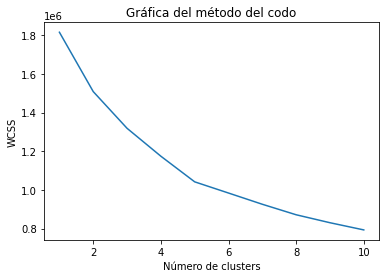

In [53]:
wcss =[]
for i in range (1,11):
  kmeans= KMeans(n_clusters=i, init = 'k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(data)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Gráfica del método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

In [46]:
kmeans = KMeans(n_clusters=5, init ='k-means++',max_iter=300,n_init=10,random_state=0 )
y_kmeans = kmeans.fit_predict(data)

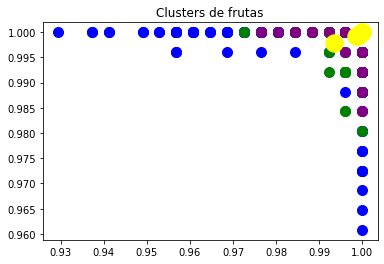

In [52]:
plt.scatter(data[y_kmeans==0, 0], data[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(data[y_kmeans==1, 0], data[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(data[y_kmeans==2, 0], data[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(data[y_kmeans==3, 0], data[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(data[y_kmeans==4, 0], data[y_kmeans==4, 1], s=100, c='purple', label ='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label ='Centroids')
plt.title('Clusters de frutas')
plt.show()

Como podemos observar en el plot de la gráfica del codo, son 5 clusters lo que se logran identificar con el tratamiento dado a los datos.
Y así mismo, podemos identificar en la gráfica de clusters que en efecto son 5, y que el que más predonima es el Cluster Azul, siguiendo el morado y así después el verde.

Por lo que se puede concluir con este algoritmo que son 5 tipos diferentes de frutas.




##Conclusión General

En general dado la visualización de las dos gráficas obtenidas con los métodos de t-SNE y K-means, donde en primera instancia obtuvimos alrededor de 8 clusters y en el segundo solamente 5, por lo que, podemos concluir que se cuenta con entre 6 y 7 tipos de frutas diferentes dentro del dataset dado.